In [1]:
from scipy.io import loadmat
from nilearn import plotting, datasets
from ipywidgets import interact
from config import DEFAULT_ABIDE_LOCATION, ATLAS_NAME
import numpy as np
import matplotlib.pyplot as plt

In [2]:
root = DEFAULT_ABIDE_LOCATION
assert root.exists(), f"{root} does not exist"
indexes = sorted(list(root.glob("5*")))

print(f"{len(indexes)} subjects found in {root}")


871 subjects found in /Data/code/sprectral_graph_convolutions/__ABIDE_dataset/ABIDE_pcp/cpac/filt_noglobal


In [3]:
# VISUALIZE TIME SERIES DATA INTERACTIVELY
def plot_signals(subject_idx=0, atlas_index=0):
    subject_path = indexes[subject_idx]
    subject_index = subject_path.name[:5]
    signal_path = list(subject_path.glob(f"*.*1D"))[0]
    assert signal_path.exists(), f"{signal_path} does not exist"
    time_series = np.loadtxt(signal_path, skiprows=0)
    plt.plot(time_series[:, :] if atlas_index==-1 else time_series[:, atlas_index], alpha=0.4 if atlas_index==-1 else 1.)
    plt.title(f"Subject #{subject_index} " + ("All HO areas " if atlas_index==-1 else f" - {ATLAS_NAME} - {atlas_index}"))
    plt.xlim(0, 200)
    plt.ylim(-300, 300)
    plt.grid(True)
    plt.show()




In [7]:
# @TODO: we miss labels from the HO atlas (111 labels used in ABIDE, 48 found in the Atlas nilearn atlas)
def plot_connectivity(subject_idx=0):
    subject_path = indexes[subject_idx]
    subject_index = subject_path.name[:5]
    con = loadmat(str(subject_path/f"{subject_index}_ho_correlation.mat"))["connectivity"]
    # print(min(con.flatten()), max(con.flatten()))
    plotting.plot_matrix(
        con,
        # labels=labels,
        # figure=(9, 7),
        figure=(6, 6),
        vmax=1,
        vmin=-1,
        title=f"Subject #{subject_index} - Connectivity matrix",
    )

# Visualize fMRI time series and connectivity
- Time series extracted at standardized locations (using the Harvard-Oxford `HO` atlas).
- As you can see, when each time serie is taken invidually, there's no coherence across patients (lack of phase synchronization, basically not the same signals or stimuli).
- In short, temporal aspect won't bring much, these curves are a mess!
- But there's coherence accross various time series for a given patient, as we'll see with the connectivity matrix.

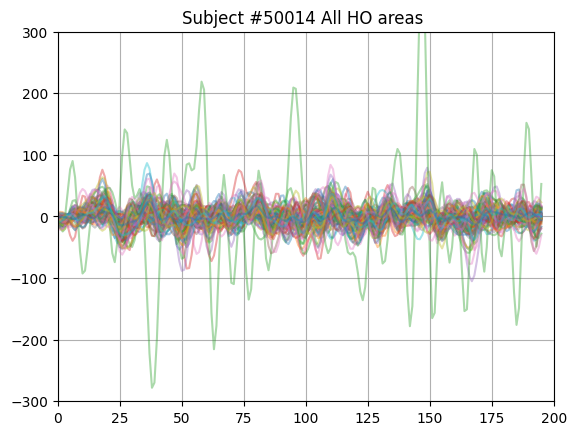

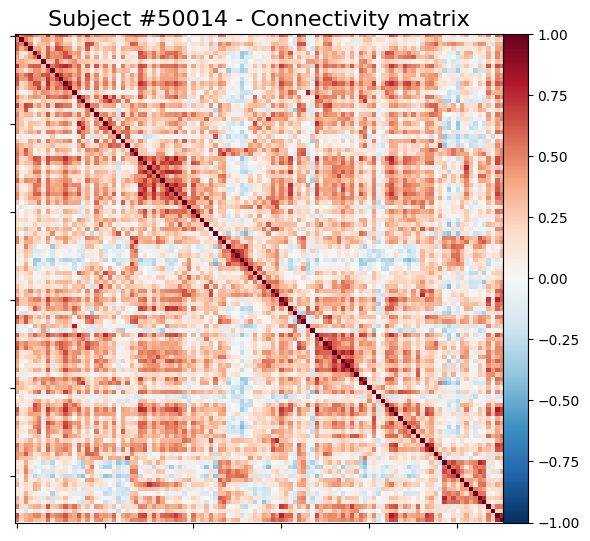

In [10]:
chosen_subject = 10
plot_signals(subject_idx=chosen_subject, atlas_index=-1);
plot_connectivity(subject_idx=chosen_subject);

# Visualize time series individually

In [ ]:
# interactively plot time series
interact(plot_signals, subject_idx=(0, len(indexes)-1, 1), atlas_index=(-1, 110, 1));

# Visualize connectivity matrix for each subject

In [ ]:
# VISUALIZE DATA INTERACTIVELY

interact(plot_connectivity, subject_idx=(0, len(indexes)-1, 1))

#### Visualizing the HO Atlas with `nilearn`

In [13]:
dataset_ho = datasets.fetch_atlas_harvard_oxford("cort-maxprob-thr25-2mm")
atlas_ho_filename = dataset_ho.filename
labels = dataset_ho["labels"]
labels

['Background',
 'Frontal Pole',
 'Insular Cortex',
 'Superior Frontal Gyrus',
 'Middle Frontal Gyrus',
 'Inferior Frontal Gyrus, pars triangularis',
 'Inferior Frontal Gyrus, pars opercularis',
 'Precentral Gyrus',
 'Temporal Pole',
 'Superior Temporal Gyrus, anterior division',
 'Superior Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, anterior division',
 'Middle Temporal Gyrus, posterior division',
 'Middle Temporal Gyrus, temporooccipital part',
 'Inferior Temporal Gyrus, anterior division',
 'Inferior Temporal Gyrus, posterior division',
 'Inferior Temporal Gyrus, temporooccipital part',
 'Postcentral Gyrus',
 'Superior Parietal Lobule',
 'Supramarginal Gyrus, anterior division',
 'Supramarginal Gyrus, posterior division',
 'Angular Gyrus',
 'Lateral Occipital Cortex, superior division',
 'Lateral Occipital Cortex, inferior division',
 'Intracalcarine Cortex',
 'Frontal Medial Cortex',
 'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)',
 'Subcallo

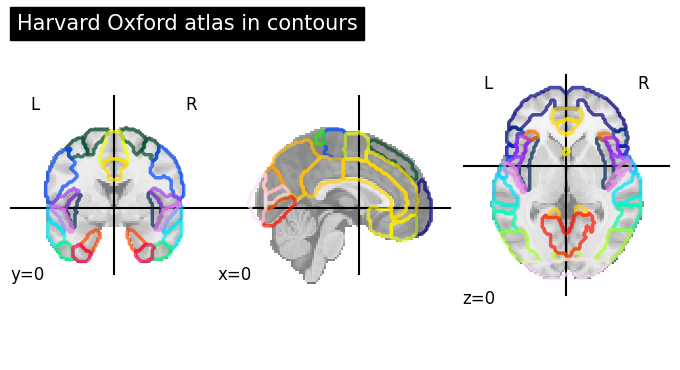

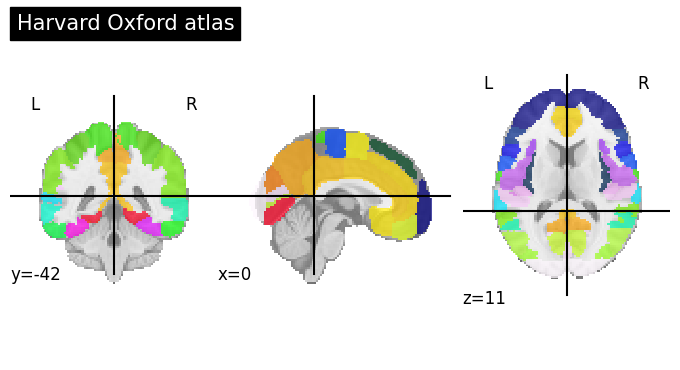

In [15]:
plotting.plot_roi(
    atlas_ho_filename,
    view_type="contours",
    title="Harvard Oxford atlas in contours",
)
plotting.show();


plotting.plot_roi(atlas_ho_filename, title="Harvard Oxford atlas");